In [1]:
import numpy as np
from utils import GamblerProblemModel, VIApproach, plot_value_iteration, plot_estimate_evolution
from time import time

## Parameters

In [2]:
PRECISION = 4
CONVERGENCE = 10e-8
GOAL = 100
SUCCESS_PROBABILITY = 0.4

## Model definition

In [3]:
# model definition
p = GamblerProblemModel(goal=GOAL, success_probability=SUCCESS_PROBABILITY)
print(f"Number of states: {p.n_states}, incl. {p.n_nonterminal_states} non-terminal states")
print(f"Number of possible actions: {p.n_actions}")

Number of states: 101, incl. 99 non-terminal states
Number of possible actions: 50


In [4]:
tp = p.define_transition_probability_matrices()
print(f"Stack of probability matrices has shape: {tp.shape}")

Stack of probability matrices has shape: (50, 101, 101)


In [5]:
a3 = tp[2]
print("Example: a single transition probability matrix for bet of 3$")
print(f"Sums of rows of the matrix (0 where corresponding action is not valid):\n{a3.sum(axis=1)}")

Example: a single transition probability matrix for bet of 3$
Sums of rows of the matrix (0 where corresponding action is not valid):
[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0.]


In [6]:
print("Extract of an initial portion of the matrix")
a3[:10, :13]

Extract of an initial portion of the matrix


array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4]])

## Value iteration

### Vectorised method

Time taken: 0.0063 s, i.e. 0.000276 s per iteration


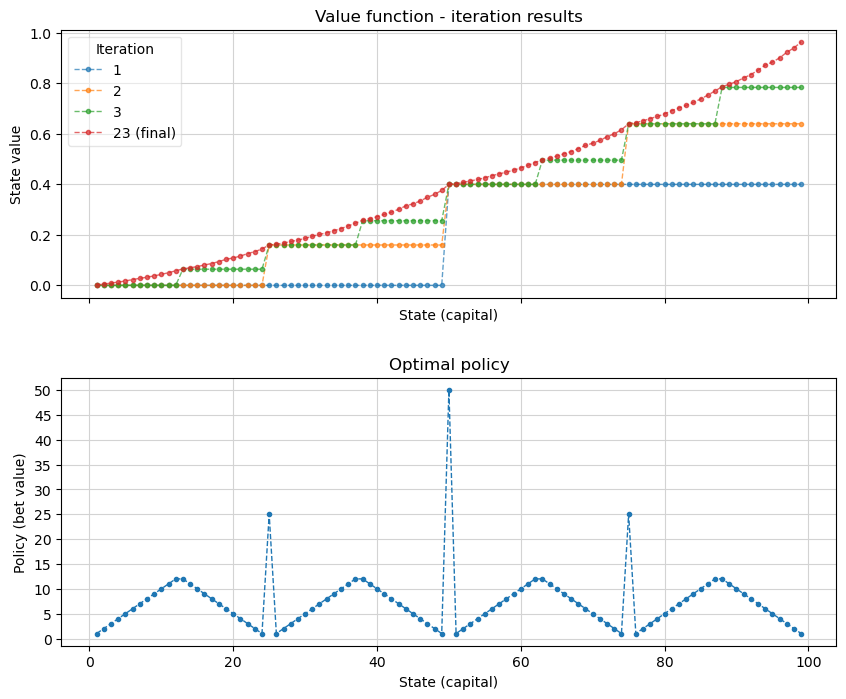

In [7]:
t0 = time()
vec_v_track, vec_pi_track, _ = p.run_value_iteration(convergence=CONVERGENCE, keep_track=True, precision=PRECISION)
t1 = time()
print(f"Time taken: {t1 - t0:.4f} s, i.e. {(t1-t0)/len(vec_v_track):6f} s per iteration")

plot_value_iteration(vec_v_track, vec_pi_track)

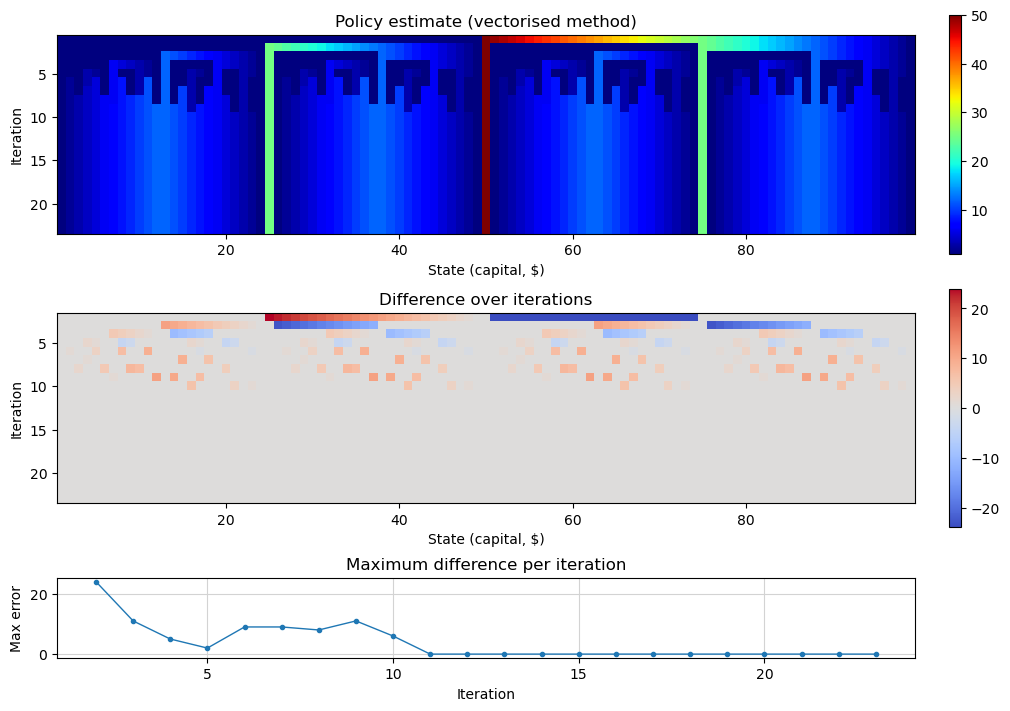

In [8]:
plot_estimate_evolution(vec_pi_track, "Policy estimate (vectorised method)", equalise_diff=True)

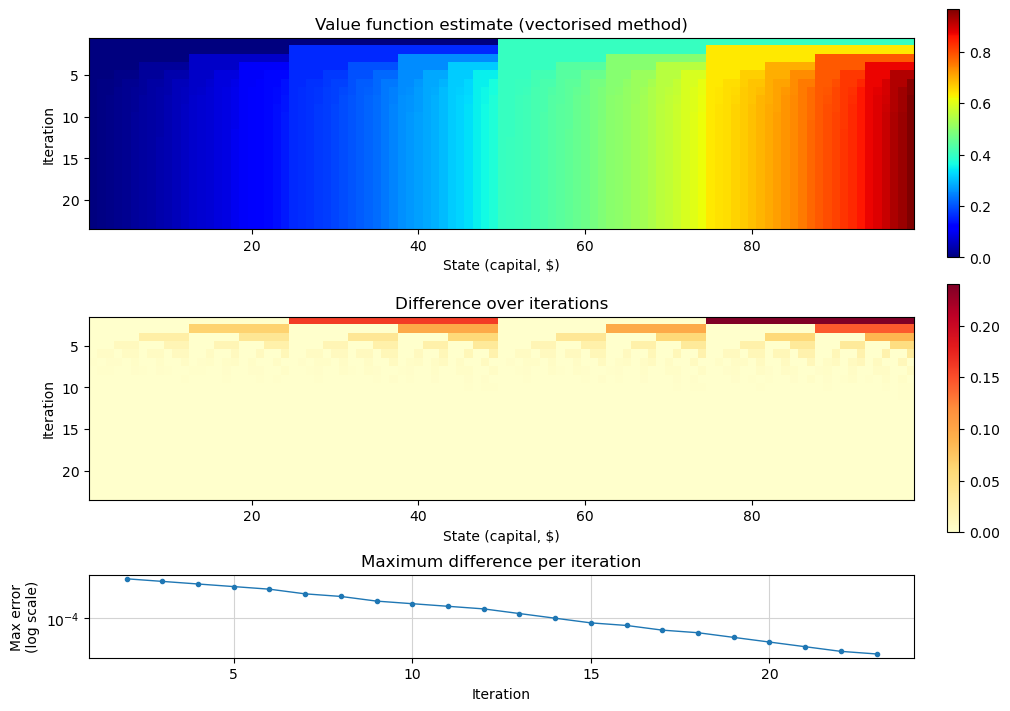

In [9]:
plot_estimate_evolution(vec_v_track, "Value function estimate (vectorised method)", log_scale_diff=True)

### In-place method

Time taken: 0.6082 s, i.e. 0.046784 s per iteration


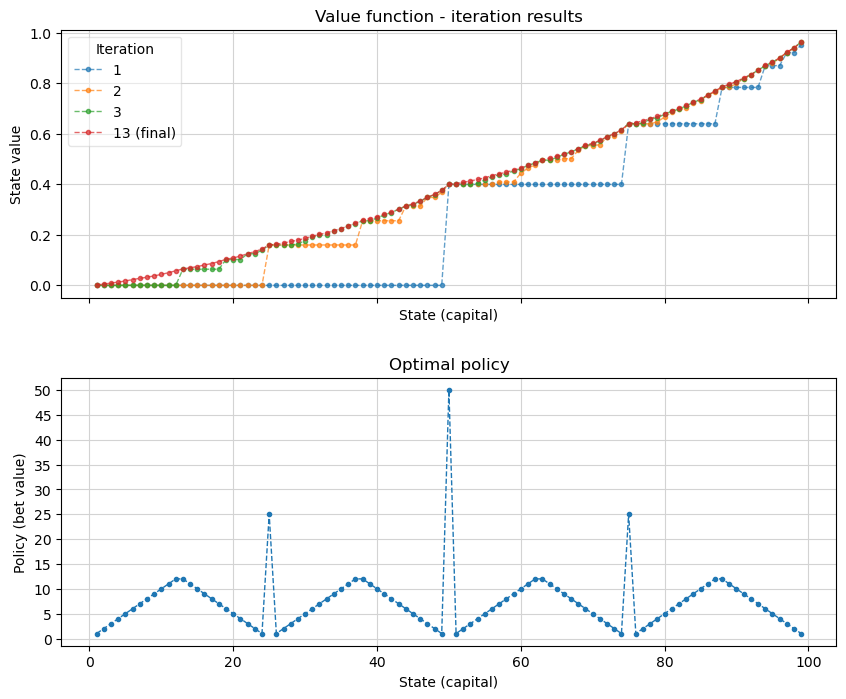

In [10]:
t0 = time()
ip_v_track, ip_pi_track, _ = p.run_value_iteration(
    convergence=CONVERGENCE, keep_track=True, approach=VIApproach.IN_PLACE, precision=PRECISION)
t1 = time()
print(f"Time taken: {t1 - t0:.4f} s, i.e. {(t1-t0)/len(ip_v_track):6f} s per iteration")

plot_value_iteration(ip_v_track, ip_pi_track)


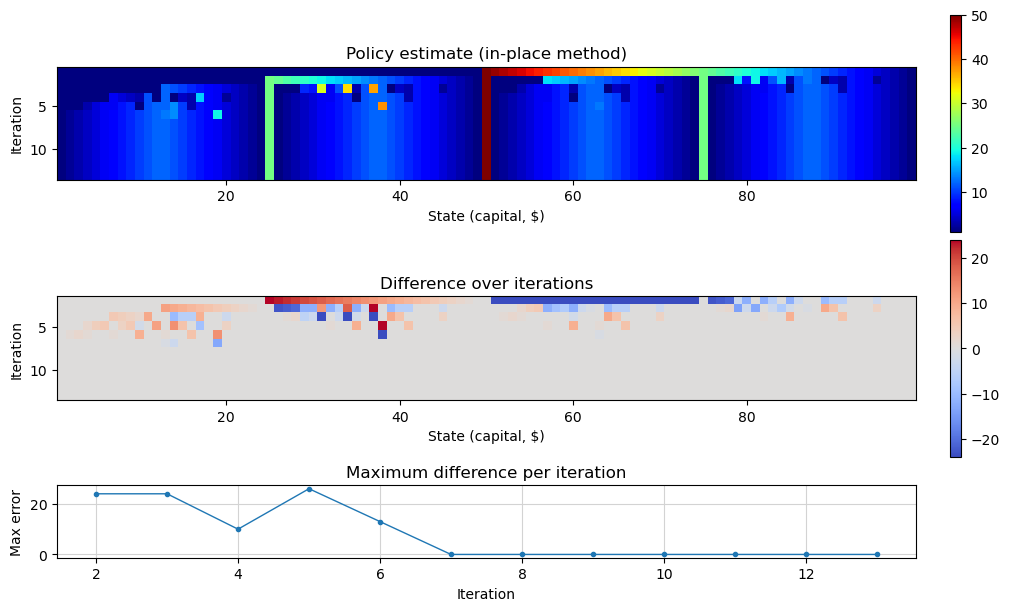

In [11]:
plot_estimate_evolution(ip_pi_track, "Policy estimate (in-place method)", fig_height=6, equalise_diff=True)

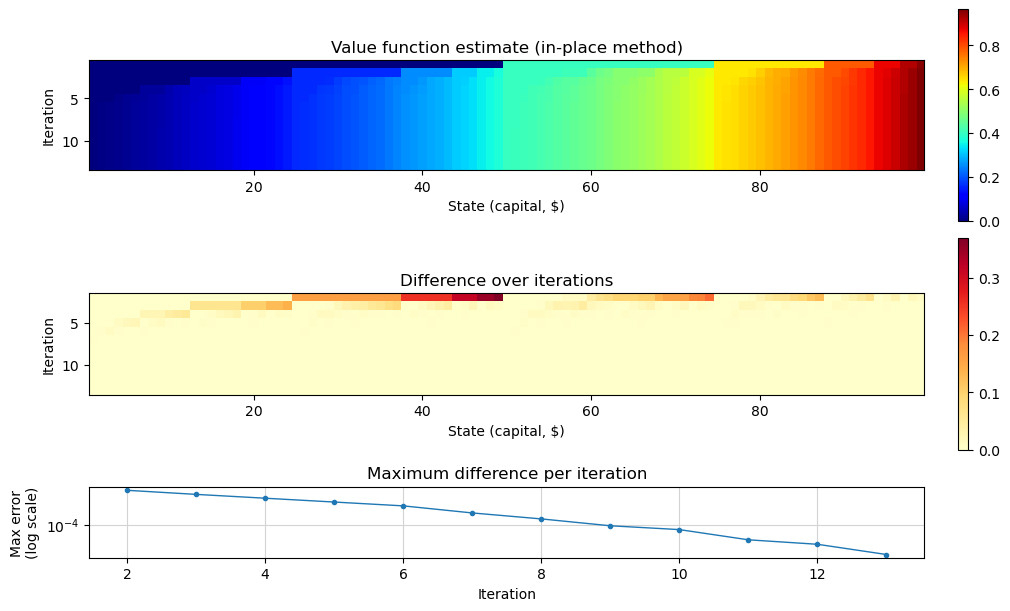

In [12]:
plot_estimate_evolution(ip_v_track, "Value function estimate (in-place method)", log_scale_diff=True, fig_height=6)

### Comparison of the two methods

In [13]:
policy_diff = vec_pi_track[-1] - ip_pi_track[-1]
if not policy_diff.any():
    print("The two policies are exactly the same")
else:
    print("Differences:")
    for i in np.where(policy_diff)[0]:
        print(f"\tFor state {i+1}, vectorised policy returns action {vec_pi_track[-1, i]}, in-placed policy returns action {ip_pi_track[-1, i]}")

The two policies are exactly the same


In [14]:
values_diff = vec_v_track[-1] - ip_v_track[-1]

print(f"Optimal value functions differ by a maximum of {np.abs(values_diff).max():.3g}, with mean {np.mean(values_diff):.3g} and standard deviation of {np.std(values_diff):.3g}")

Optimal value functions differ by a maximum of 1.14e-07, with mean -2.7e-08 and standard deviation of 2.62e-08
